## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [42]:
!nvidia-smi

Thu Mar  7 16:41:54 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.23                 Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090      WDDM  |   00000000:01:00.0  On |                  Off |
|  0%   40C    P8             12W /  450W |    1743MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [8]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\user\Syolo\YoloV9\YoloV9\yolov9


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [9]:
!git clone https://github.com/SkalskiP/yolov9.git

Cloning into 'yolov9'...


In [2]:
!pip install -r yolov9/requirements.txt --user -q
d

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

**NOTE:** Let's install additional packages that will be useful later on.

In [12]:
!pip install -q roboflow

In [14]:
!pip install numpy

## Imports

In [3]:
import roboflow

from IPython.display import Image

## Download model weights

**NOTE:** In the YOLOv9 paper, versions yolov9-s and yolov9-m are also mentioned, but the weights for these models are not yet available in the YOLOv9 repository.

**NOTE:** By default, the results of each subsequent inference sessions are saved in `{HOME}/yolov9/runs/detect/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

## Authenticate and Download the Dataset

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="DZr82uud5ZnQ81YazKlz")
project = rf.workspace("project-rice").project("rice-leaf-i1yu9")
version = project.version(1)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rice-leaf-1 in yolov9:: 100%|████████████████████| 516/516 [00:00<00:00, 6849.38it/s]


In [17]:
nvidia-smi --query-gpu=name --format=csv,noheader | wc -l


SyntaxError: cannot assign to expression (1528732085.py, line 1)

In [18]:
!pip install pickleshare

## Train Custom Model

In [21]:
%cd {HOME}/yolov9
#run in command line 
# python yolov9/train.py --batch 8 --epochs 500 --img 640 --device 0 --min-items 0 --close-mosaic 500 --data ./yolov9/rice-leaf-1/data.yaml --weights ./weights/gelan-c.pt  --cfg ./yolov9/models/detect/gelan-c.yaml  --hyp hyp.scratch-high.yaml
!python train.py \
--batch 8 --epochs 100 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-e.pt \
--cfg models/detect/gelan-e.yaml \
--hyp hyp.scratch-high.yaml

C:\Users\user\Syolo\YoloV9\YoloV9\yolov9


C:\Users\user\anaconda3\envs\YoloV9\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
train: weights={HOME}/weights/gelan-e.pt, cfg=models/detect/gelan-e.yaml, data={dataset.location}/data.yaml, hyp=hyp.scratch-high.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Traceback (most recent call last):
  File "C:\Users\user\Syolo\YoloV9\YoloV9\yol

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [16]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    P_curve.png       train_batch2.jpg
events.out.tfevents.1709432296.cea7cd620b1c.1581.0  PR_curve.png      val_batch0_labels.jpg
F1_curve.png					    R_curve.png       val_batch0_pred.jpg
hyp.yaml					    results.csv       val_batch1_labels.jpg
labels_correlogram.jpg				    results.png       val_batch1_pred.jpg
labels.jpg					    train_batch0.jpg  weights
opt.yaml					    train_batch1.jpg


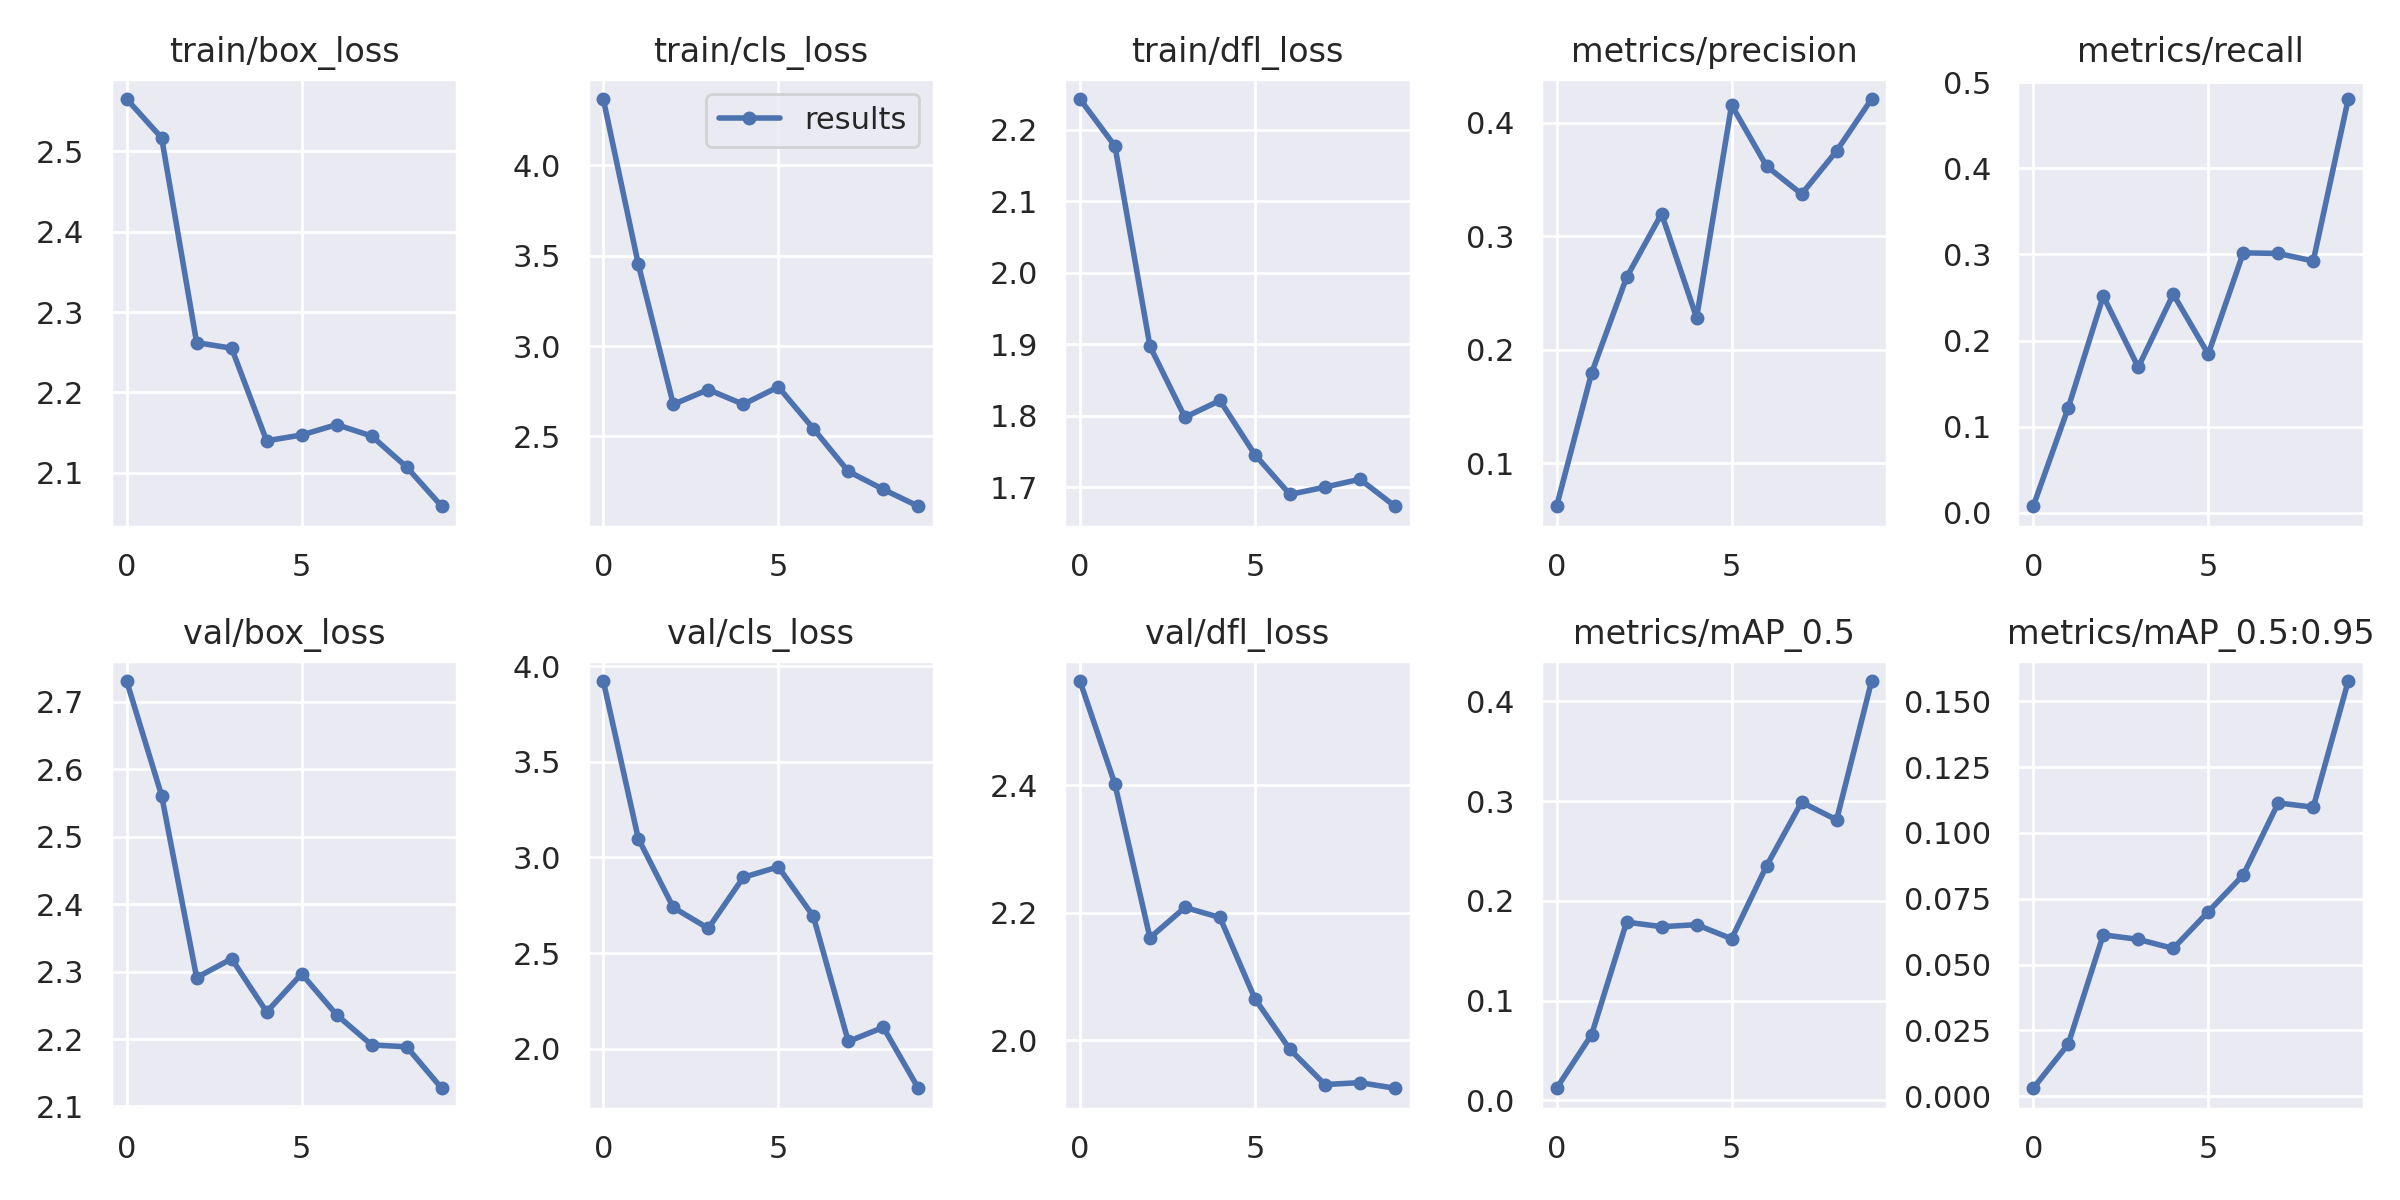

In [22]:
Image(filename=f"{HOME}/yolov9/runs/train/exp2/results.png", width=1000)

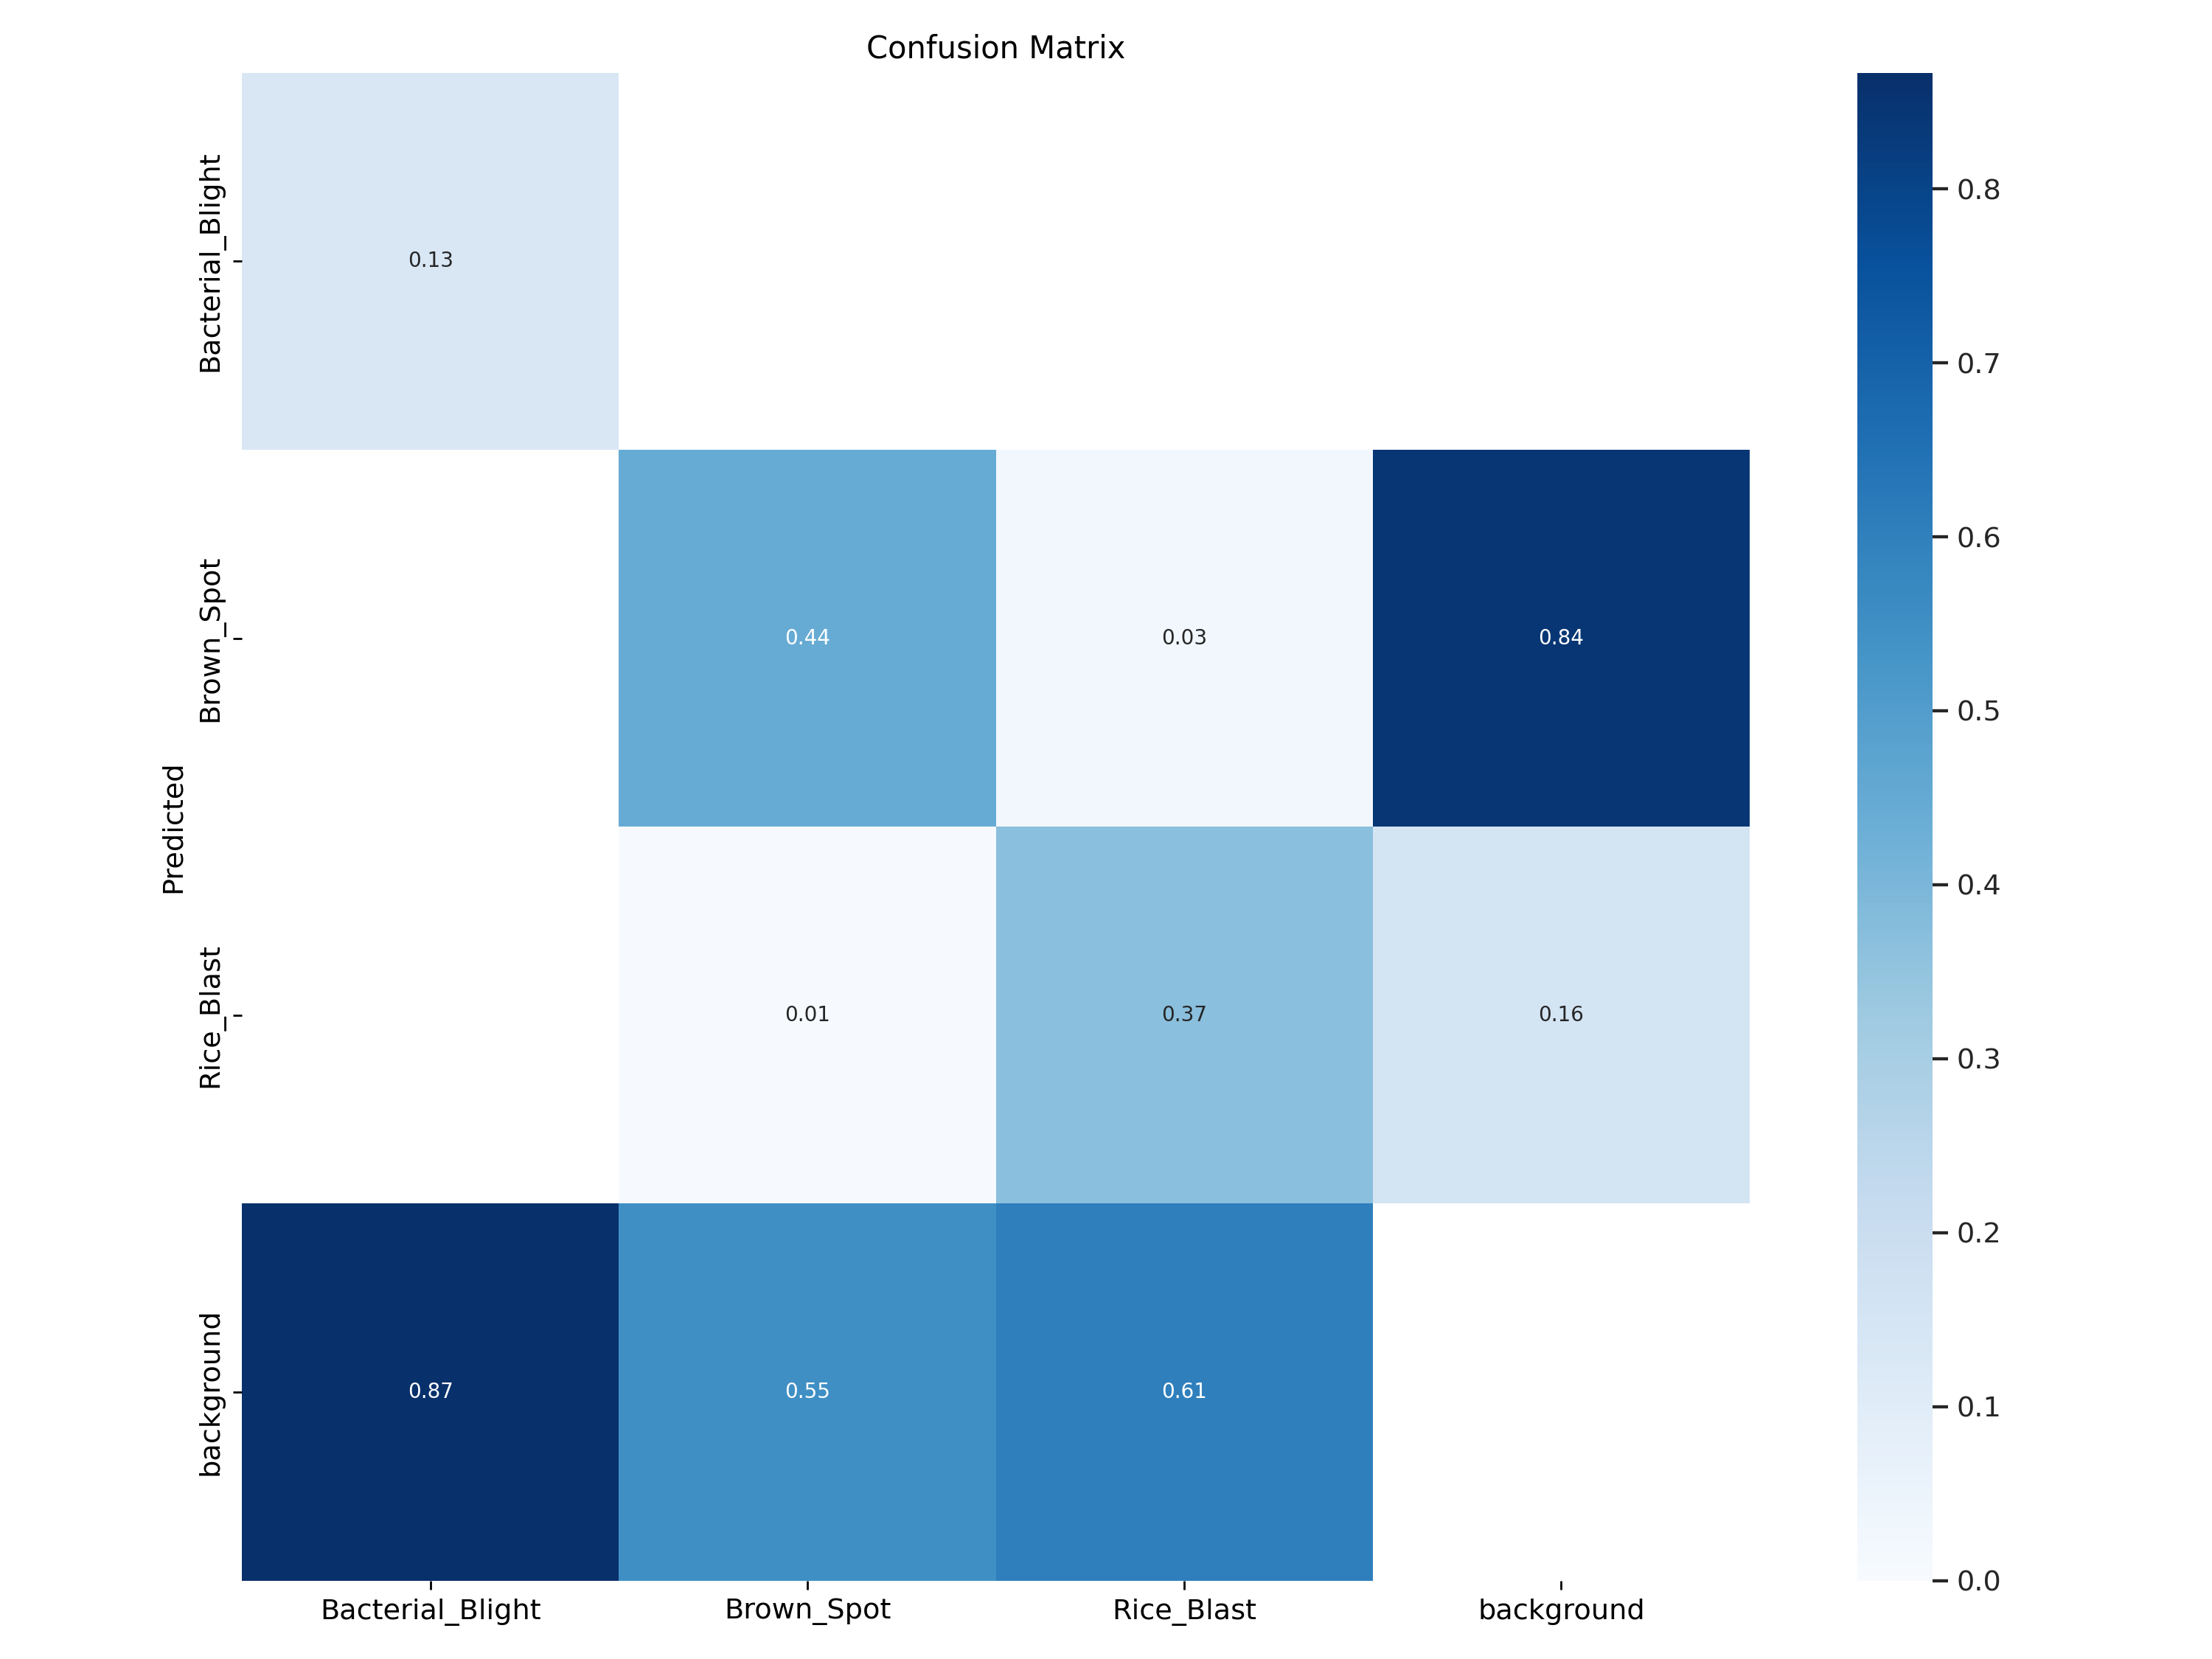

In [23]:
Image(filename=f"{HOME}/yolov9/runs/train/exp2/confusion_matrix.png", width=1000)

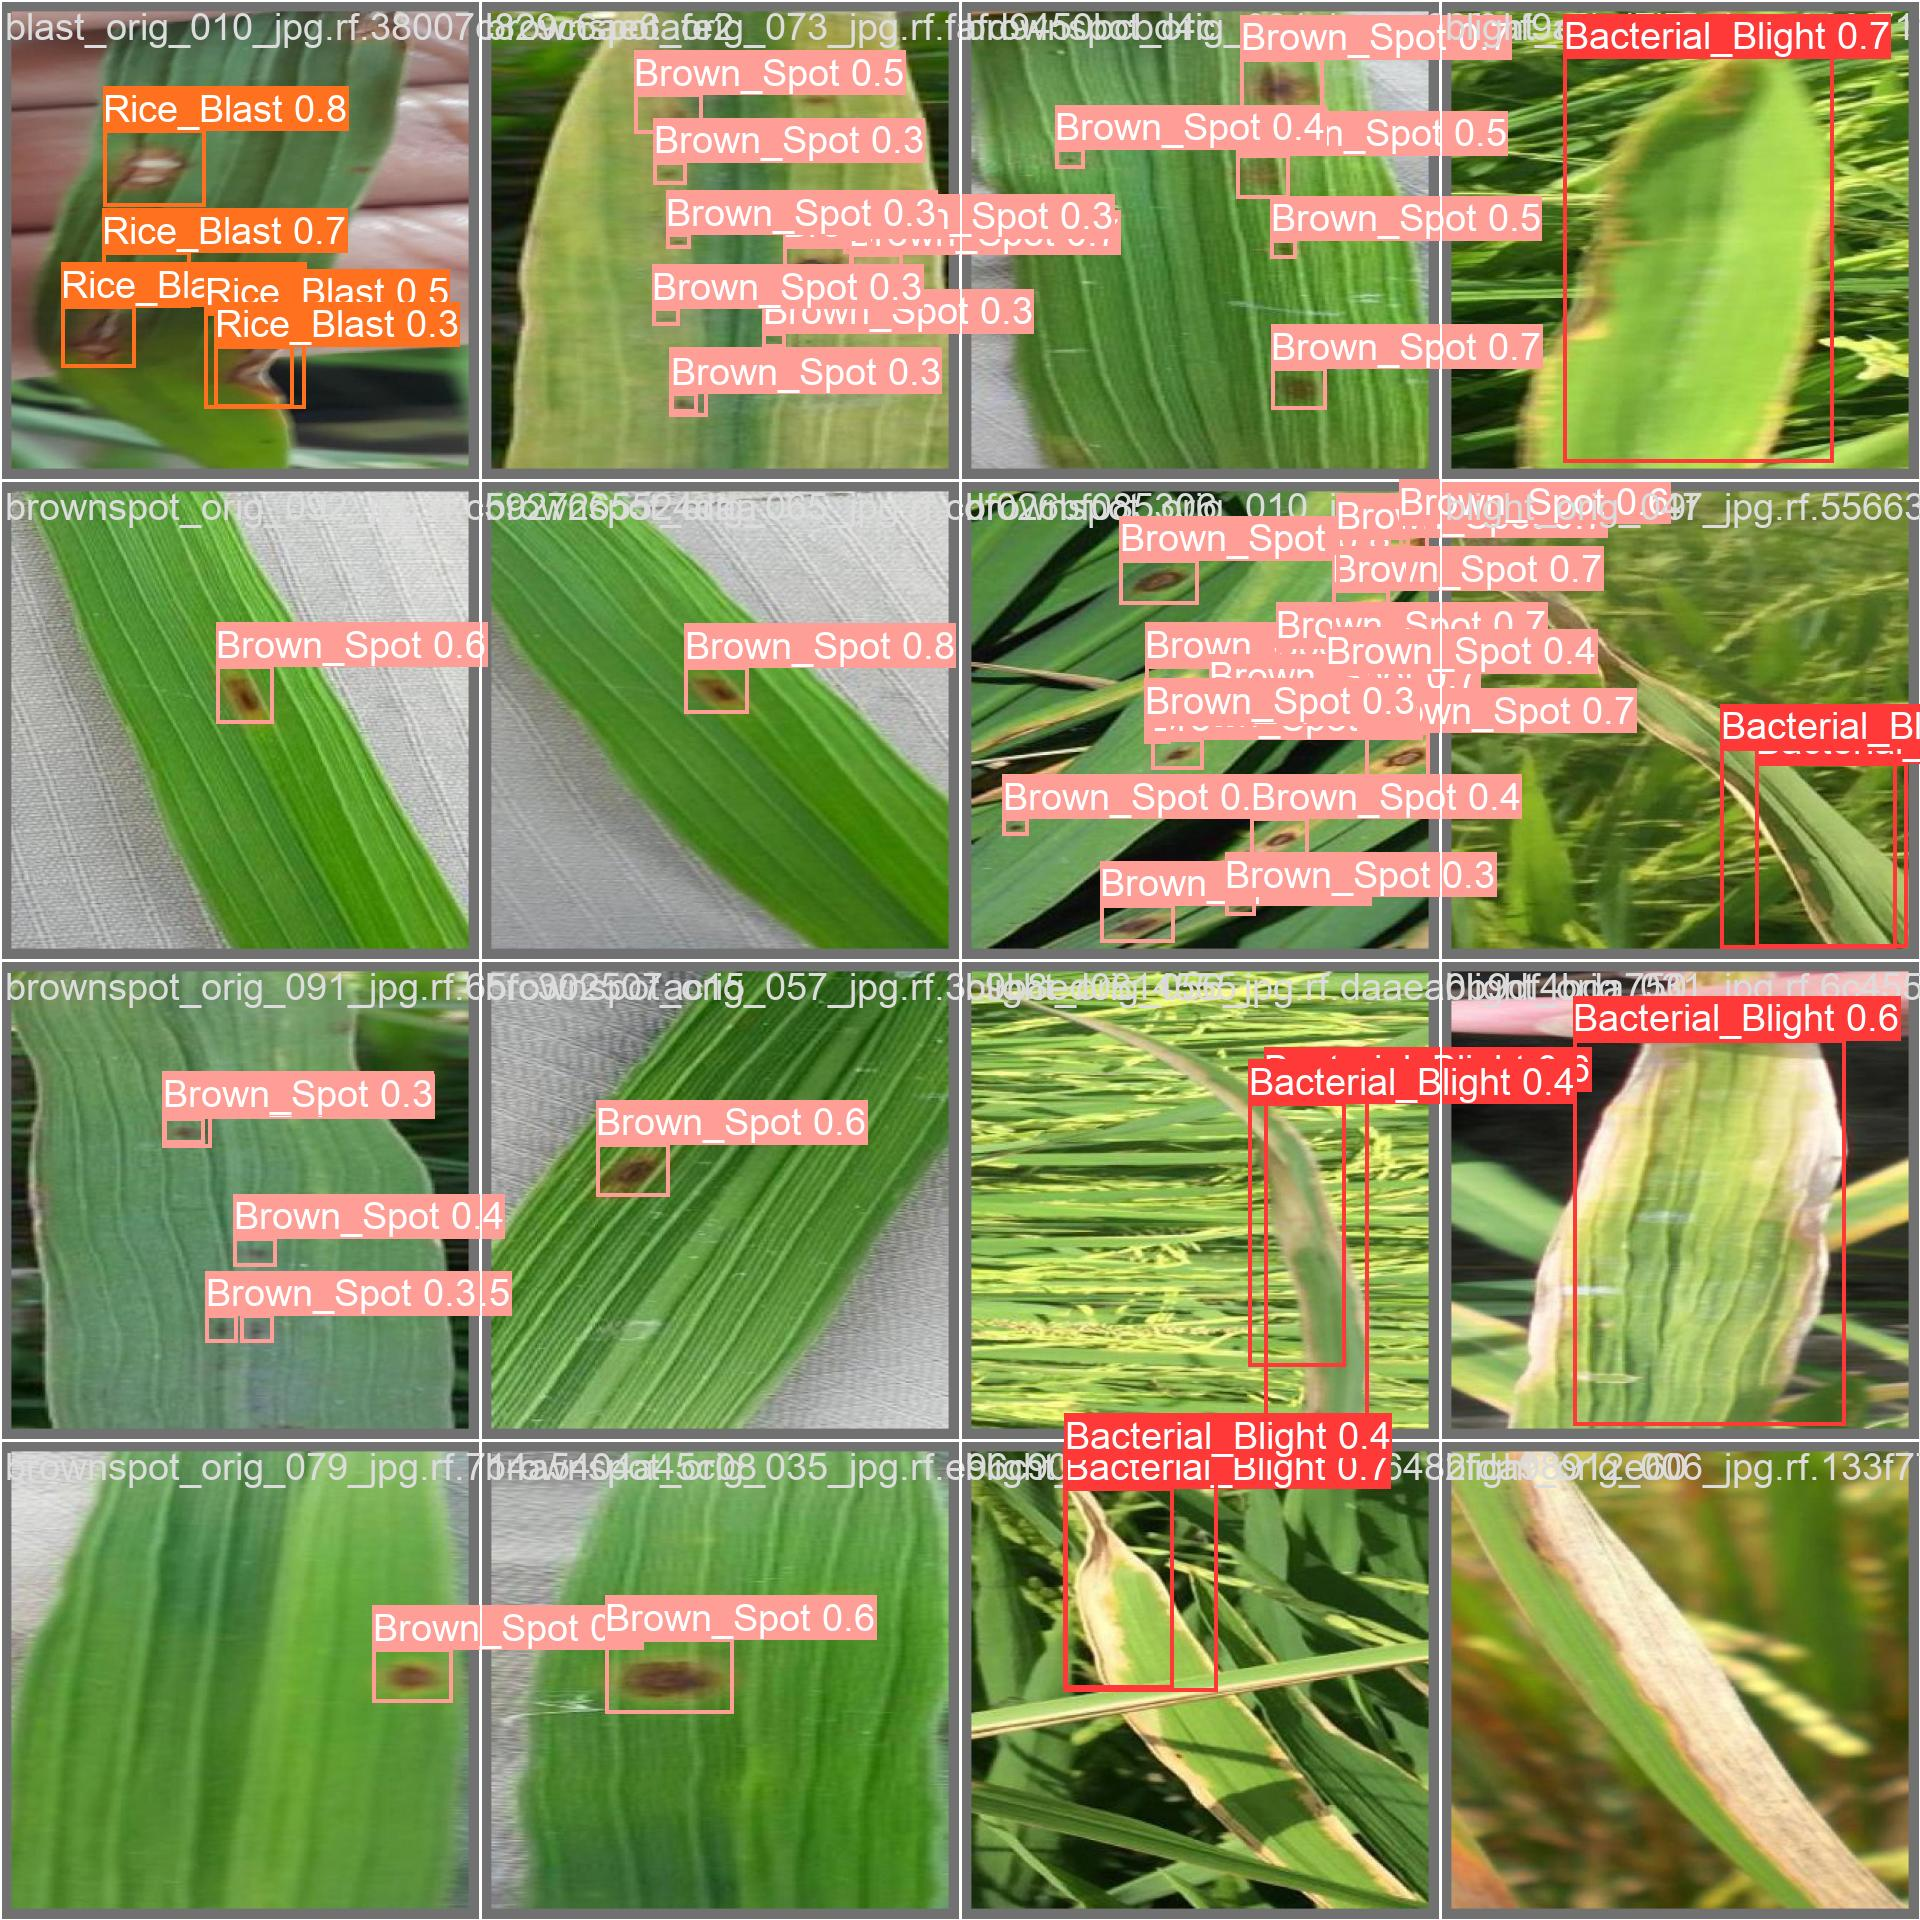

In [24]:
Image(filename=f"./runs/train/exp2/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [26]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp2/weights/best.pt

/content/yolov9
val: data=/content/yolov9/rice-leaf-1/data.yaml, weights=['/content/yolov9/runs/train/exp2/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25413273 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/rice-leaf-1/valid/labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100% 51/51 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 7/7 [00:04<00:00,  1.64it/s]
                   all         51        264      0.419       0.48      0.421      0.159
      Bacterial_Blight         51         15      0.378      

## Inference with Custom Model

In [28]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp2/weights/best.pt \
--source {dataset.location}/valid/images

detect: weights=['/content/yolov9/runs/train/exp2/weights/best.pt'], source=/content/yolov9/rice-leaf-1/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25413273 parameters, 0 gradients, 102.5 GFLOPs
image 1/51 /content/yolov9/rice-leaf-1/valid/images/blast_orig_001_jpg.rf.7cc8e5b14392ef7f51ea3457c0efe164.jpg: 640x640 1 Bacterial_Blight, 3 Brown_Spots, 51.6ms
image 2/51 /content/yolov9/rice-leaf-1/valid/images/blast_orig_002_jpg.rf.f88df0364fa05a396ab7a5fa85bb2867.jpg: 640x640 1 Bacterial_Blight, 1 Brown_Spot

In [31]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [34]:
%tensorboard --inspect --event_file C:/Users/user/Syolo/YoloV9/YoloV9/runs/train/exp2/events.out.tfevents.1709690207.DESKTOP-GSB1P85.15600.0


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2024-03-06 11:51:46.917881: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

2024-03-06 11:51:48.741967: E external/local_tsl/tsl/platform/windows/windows_file_system.cc:363] ERROR: GetSymbolicLinkTarget cannot open file for \\?\C:\Users\user\Syolo\YoloV9\YoloV9\runs\train\exp2\events.out.tfevents.1709690207.DESKTOP-GSB1P85.15600.0 GetLastError: 3

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\user\anaconda3\envs\YoloV9\Scripts\tensorboard.exe\__main__.py", line 7, in <module>
  File "C:\Users\user\anaconda3\envs\YoloV9\Lib\site-packages\tensorboard\main.py", line 46, in run_main
    app.run

In [40]:
%tensorboard --inspect --event_file "C:/Users/user/Syolo/YoloV9/YoloV9/yolov9/runs/train/exp2/events.out.tfevents.1709690207.DESKTOP-GSB1P85.15600.0"


ERROR: Failed to launch TensorBoard (exited with 0).
Contents of stderr:
2024-03-06 11:54:04.658018: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Contents of stdout:
Processing event files... (this can take a few minutes)

These tags are in C:/Users/user/Syolo/YoloV9/YoloV9/yolov9/runs/train/exp2/events.out.tfevents.1709690207.DESKTOP-GSB1P85.15600.0:
audio -
histograms -
images
   F1_curve
   PR_curve
   P_curve
   R_curve
   confusion_matrix
   results
scalars
   metrics/mAP_0.5
   metrics/mAP_0.5:0.95
   metrics/precision
   metrics/recall
   train/box_loss
   train/cls_loss
   train/dfl_loss
   val/box_loss
   val/cls_loss
   val/dfl_loss
   x/lr0
   x/lr1
   x/lr2
tensor -

Event statistics for C:/Users/user/Syolo/YoloV9/YoloV9/yolov9/runs/train/exp2/events.out.tf

In [30]:
DIRECTORY_PATH ="C:/Users/user/Syolo/YoloV9/YoloV9/runs/train/exp2"
print(DIRECTORY_PATH)


C:/Users/user/Syolo/YoloV9/YoloV9/runs/train/exp2


In [38]:
%tensorboard --inspect --logdir DIRECTORY_PATH



ERROR: Failed to launch TensorBoard (exited with 0).
Contents of stderr:
2024-03-06 11:53:09.825440: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Contents of stdout:
Processing event files... (this can take a few minutes)

No event files found within logdir DIRECTORY_PATH

In [41]:
%tensorboard --logdir "C:/Users/user/Syolo/YoloV9/YoloV9/yolov9/runs/train/exp2/events.out.tfevents.1709690207.DESKTOP-GSB1P85.15600.0"


In [36]:


%tensorboard --logdir DIRECTORY_PATH


Reusing TensorBoard on port 6011 (pid 9780), started 0:07:04 ago. (Use '!kill 9780' to kill it.)

In [12]:
%load_ext tensorboard


In [7]:
!pip install tensorflow

^C


In [ ]:
!pip install tensorboard

In [ ]:
!pip install -r requirements.txt

In [16]:
os.path.abspath('./rice-leaf-1/data.yaml')


'C:\\Users\\user\\Syolo\\YoloV9\\YoloV9\\yolov9\\rice-leaf-1\\data.yaml'

In [22]:
%cd {HOME}

!python val_dual.py \
--img 640 --batch 8 --conf 0.001 --iou 0.5 --device 0 \
--data ./rice-leaf-1/test.yaml \
--weights ./runs/train/exp21/weights/best.pt

C:\Users\user\Syolo\YoloV9\YoloV9\yolov9
.


val_dual: data=./rice-leaf-1/test.yaml, weights=['./runs/train/exp21/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.5, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
'git' is not recognized as an internal or external command,
operable program or batch file.
YOLOv5  2024-3-3 Python-3.11.8 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

Fusing layers... 
yolov9-ce summary: 724 layers, 12963634 parameters, 0 gradients, 60.5 GFLOPs

val: Scanning C:\Users\user\Syolo\YoloV9\YoloV9\yolov9\rice-leaf-1\test\labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 00:00
val: Scanning C:\Users\user\Syolo\YoloV9\YoloV9\yolov9\rice-leaf-1\test\labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 00:00

                 Class  

In [19]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights ./runs/train/exp21/weights/best.pt \
--source rice-leaf-1/valid/images

detect: weights=['./runs/train/exp21/weights/best.pt'], source=rice-leaf-1/valid/images, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
'git' is not recognized as an internal or external command,
operable program or batch file.
YOLOv5  2024-3-3 Python-3.11.8 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

Fusing layers... 
yolov9-ce summary: 724 layers, 12963634 parameters, 0 gradients, 60.5 GFLOPs
image 1/51 C:\Users\user\Syolo\YoloV9\YoloV9\yolov9\rice-leaf-1\valid\images\blast_orig_001_jpg.rf.7cc8e5b14392ef7f51ea3457c0efe164.jpg: 640x640 3 Brown_Spots, 9.5ms
image 2/51 C:\Users\user\Syolo\YoloV9\YoloV9\yolov9\rice-leaf-1\valid\

In [10]:
{HOME}/runs/train/exp21/weights/best.pt

NameError: name 'runs' is not defined

In [9]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/runs/train/exp21/weights/best.pt \
--source {dataset.location}/valid/images

detect: weights=['{HOME}/runs/train/exp21/weights/best.pt'], source={dataset.location}/valid/images, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
'git' is not recognized as an internal or external command,
operable program or batch file.
YOLOv5  2024-3-3 Python-3.11.8 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

Traceback (most recent call last):
  File "C:\Users\user\Syolo\YoloV9\YoloV9\yolov9\detect.py", line 232, in <module>
    main(opt)
  File "C:\Users\user\Syolo\YoloV9\YoloV9\yolov9\detect.py", line 227, in main
    run(**vars(opt))
  File "C:\Users\user\anaconda3\envs\YoloV9\Lib\site-packages\torch\utils\_contextlib.p

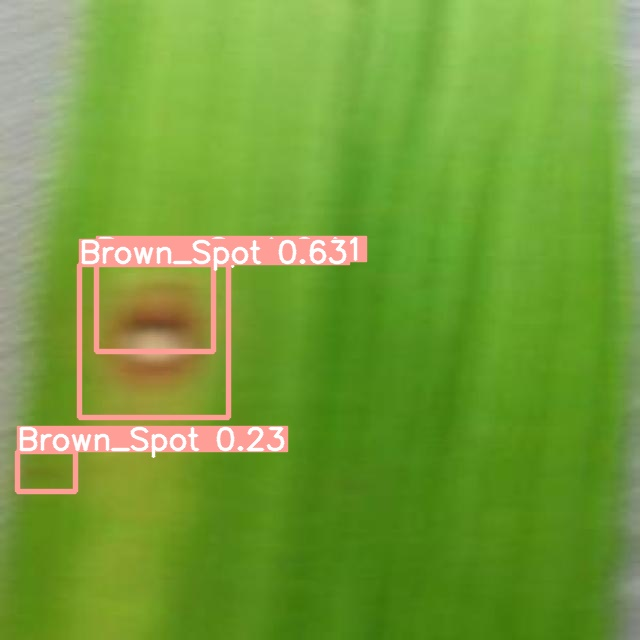

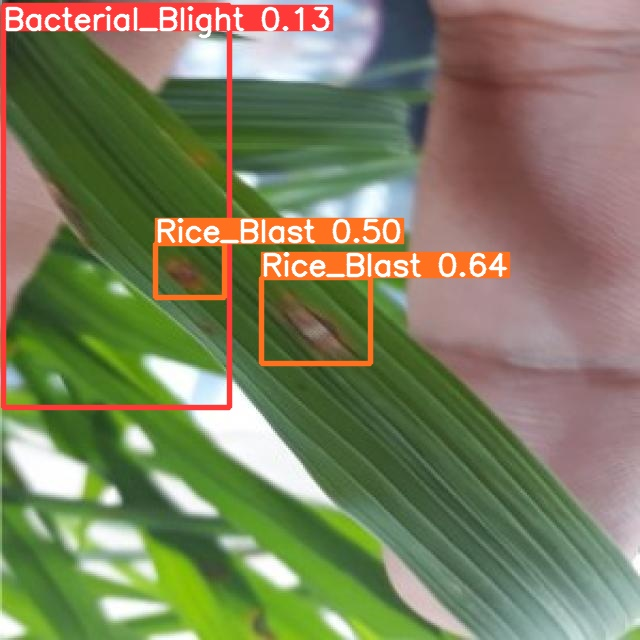

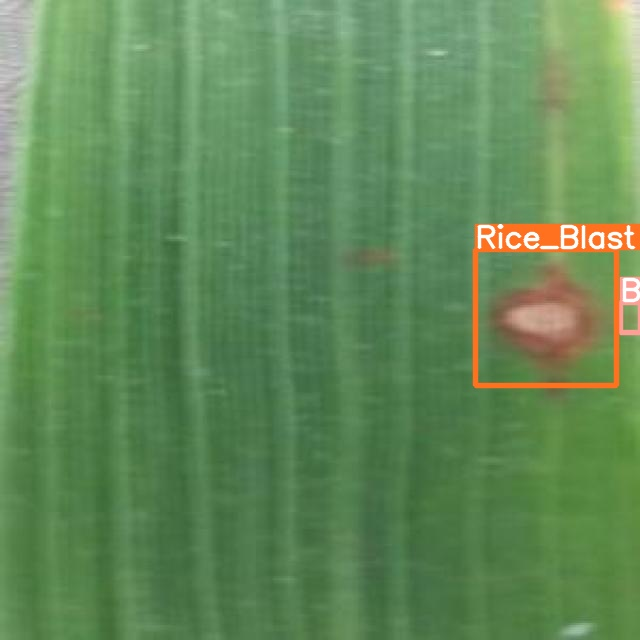

In [21]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'./runs/detect/exp3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [1]:
!python detect.py \
--img 640 --conf 0.5 --device 0 \
--weights {HOME}/runs/train/exp25/weights/best.pt \
--source {dataset.location}/test/images

Traceback (most recent call last):
  File "C:\Users\user\Syolo\YoloV9\YoloV9\yolov9\detect.py", line 15, in <module>
    from models.common import DetectMultiBackend
  File "C:\Users\user\Syolo\YoloV9\YoloV9\yolov9\models\common.py", line 13, in <module>
    from kornia.filters import canny
ModuleNotFoundError: No module named 'kornia'


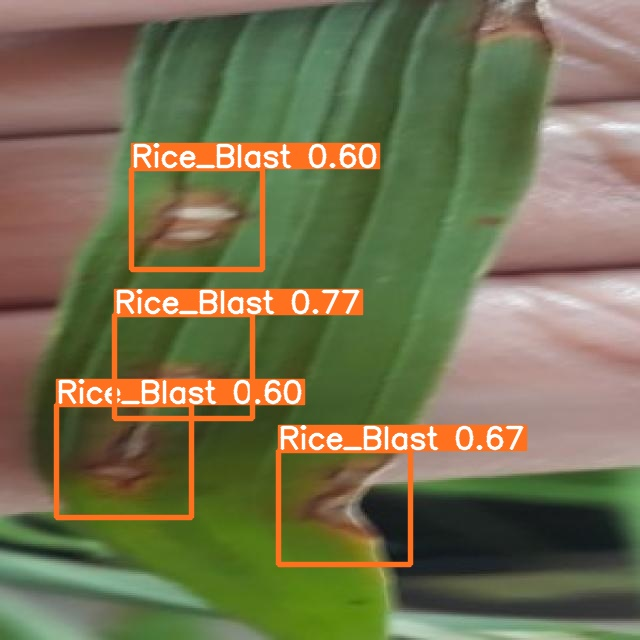

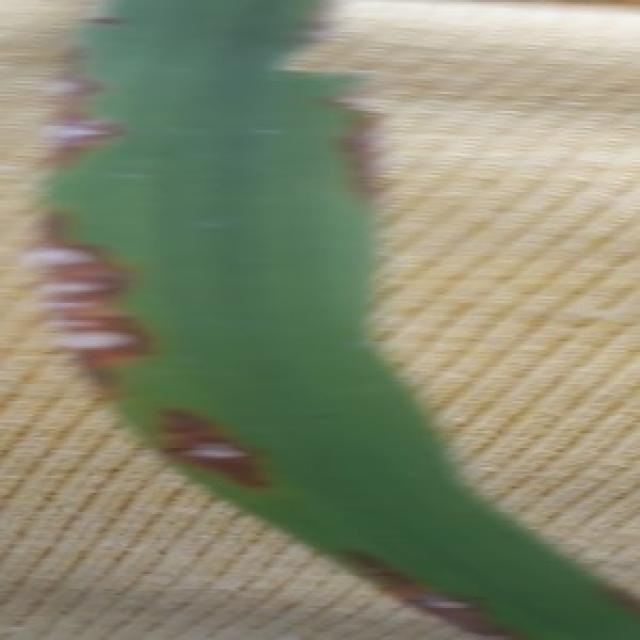

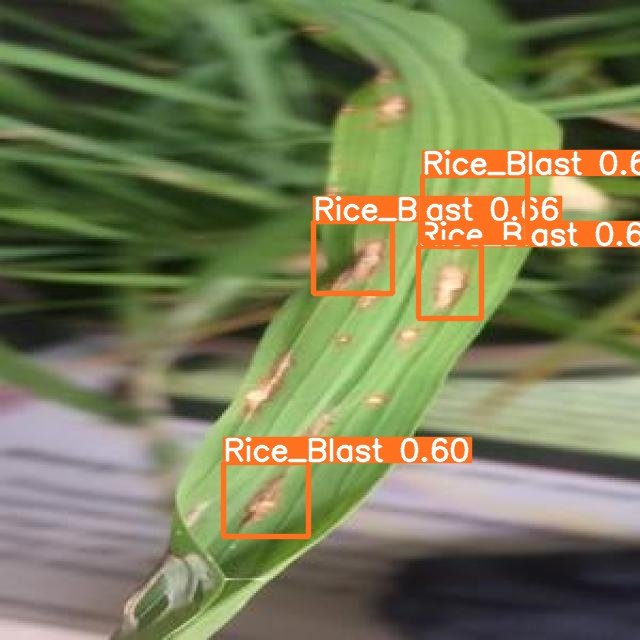

In [2]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'./runs/detect/exp4/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")